In [ ]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from random import seed
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  StandardScaler

from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,StratifiedShuffleSplit
import itertools
from sklearn.metrics import cohen_kappa_score, make_scorer,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

import pandas_profiling
import bokeh
import plotly.tools as tls
import statsmodels.api as sm
from sklearn.decomposition import PCA
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import statsmodels.formula.api as smf



In [ ]:
from google.colab import files
files.upload()

Saving insurance.csv to insurance (1).csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [ ]:
#!pip install chart_studio
#!pip install pycaret
#!pip install pandas_profiling

In [ ]:
df=pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data=pd.read_csv('insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

In [ ]:
pandas_profiling.ProfileReport(data)

TypeError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [ ]:
print(data)
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000     

In [ ]:
data.corr()['charges'].sort_values()


region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

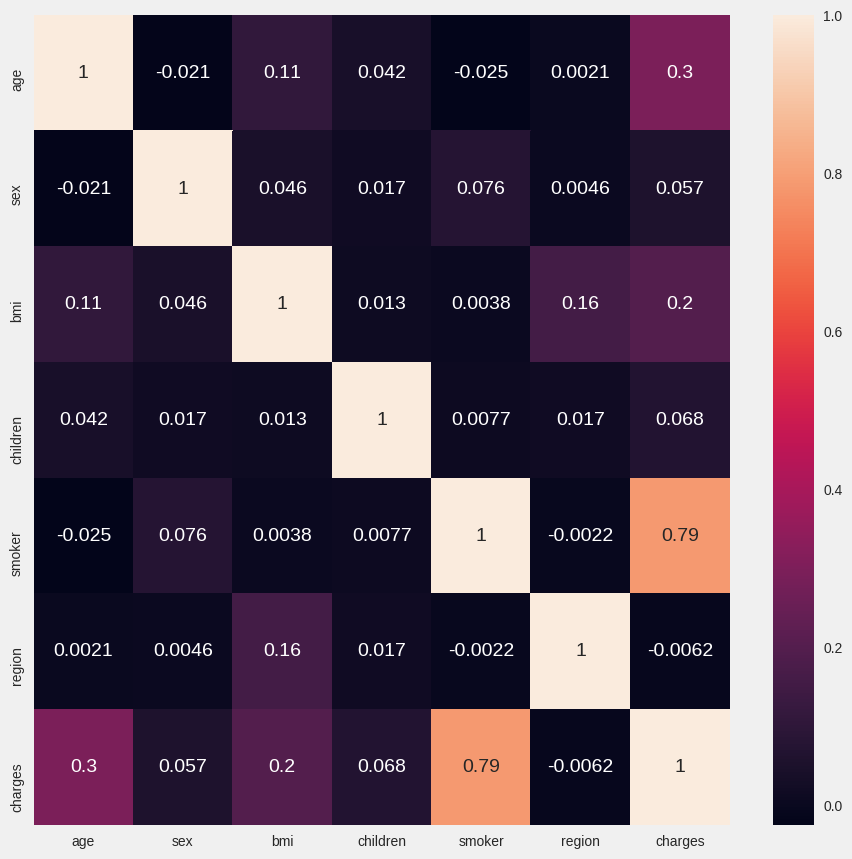

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.savefig('corr-variables')

In [ ]:
#A strong correlation is observed only with the fact of smoking the patient. To be honest, 
#I expected a higher correlation with bmi. Well. We investigate smoking in more detail.

In [ ]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

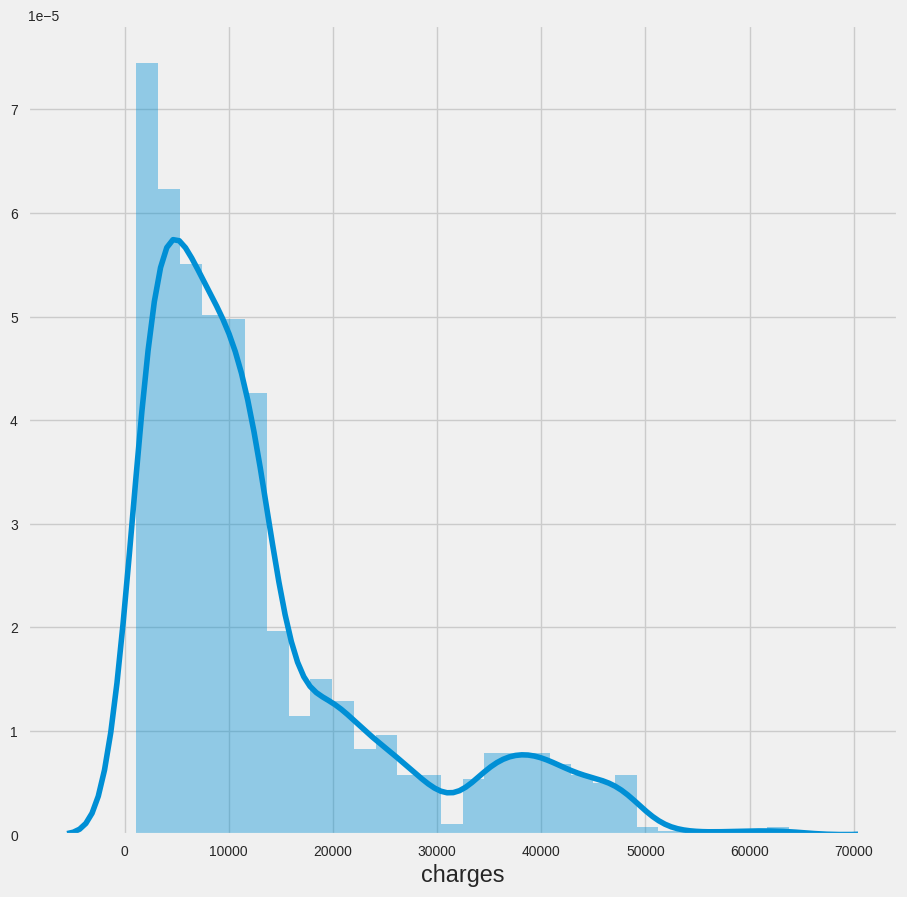

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data['charges'])
plt.savefig('charges_distribution')

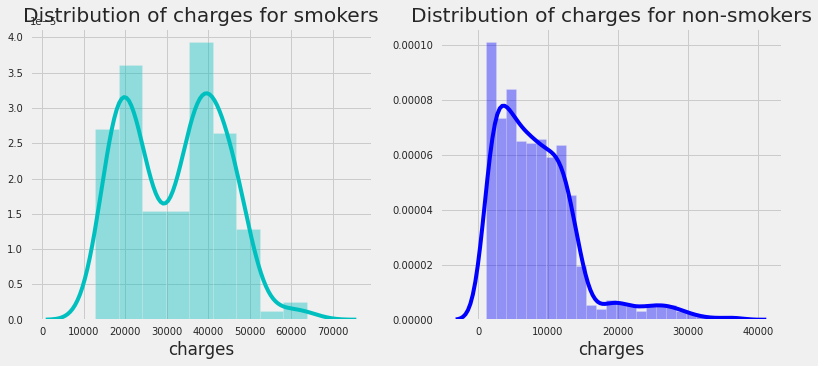

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.savefig('charges_distribution of smokers vs non-smokers')

In [ ]:
#Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. Going to check it.

<Figure size 1200x500 with 0 Axes>

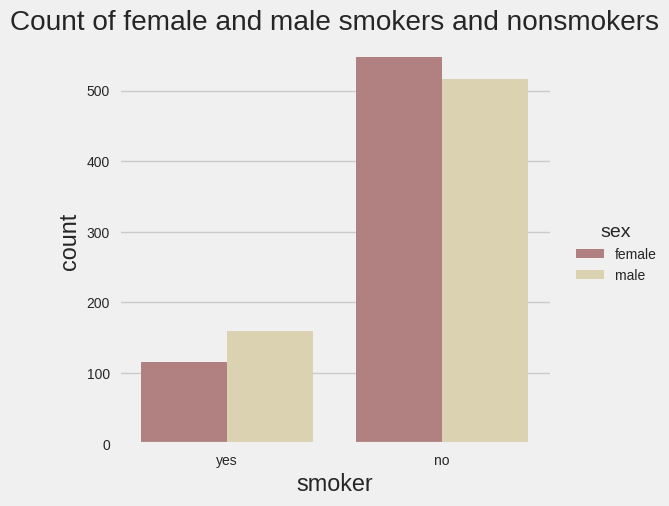

In [ ]:
plt.figure(figsize=(12,5))
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)
plt.title('Count of female and male smokers and nonsmokers')
plt.savefig('Count of female and male smokers and nonsmokers')


In [ ]:
#The data has more non smokers,than smokers and men smoke more than female.

<Figure size 1080x1080 with 0 Axes>

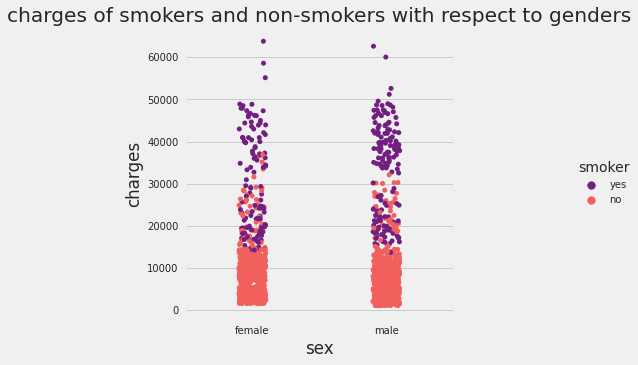

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x="sex", y="charges", hue="smoker",
             data=df, palette = 'magma')
plt.title('charges of smokers and non-smokers with respect to genders')
plt.savefig('charges of smokers and non-smokers with respect to genders')

In [ ]:
df.groupby('smoker',as_index=True).agg({'charges':np.mean})

,charges
smoker,
no,8434.268298
yes,32050.231832


In [ ]:
pd.crosstab(df['sex'],df['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [ ]:
  #People who don't smoke end up having less medical costs,however there are excepting pertaining to age.

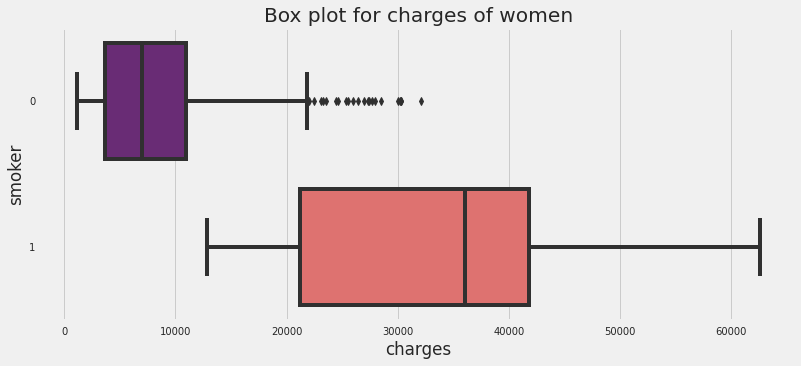

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')
plt.savefig('Boxplot showing charges of women smokers and non smokers')

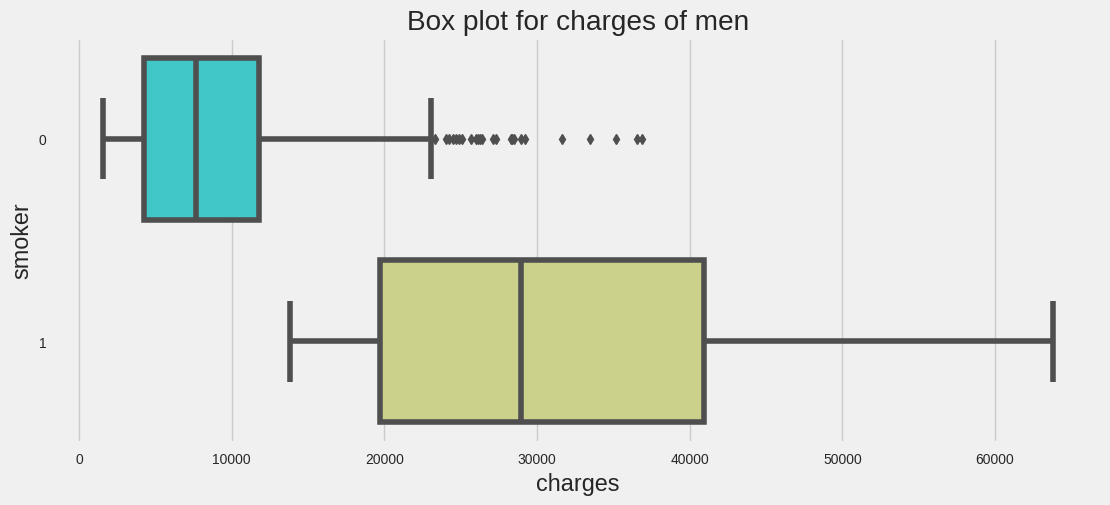

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')
plt.savefig('Boxplot showing charges of men smokers and non smokers')

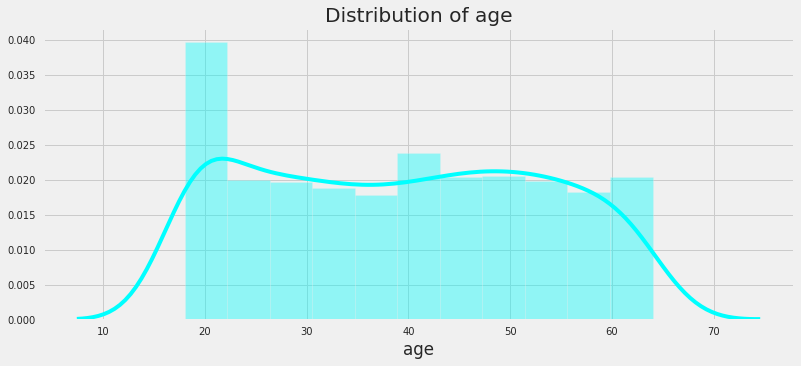

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'aqua')
plt.savefig('Distribution of age in the datset')

In [ ]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
#We have patients under 20 in our data set. 
#The minimum age of patients is 18. The maximum age is 64 years. My personal interest is whether there are smokers among patients 18 years.

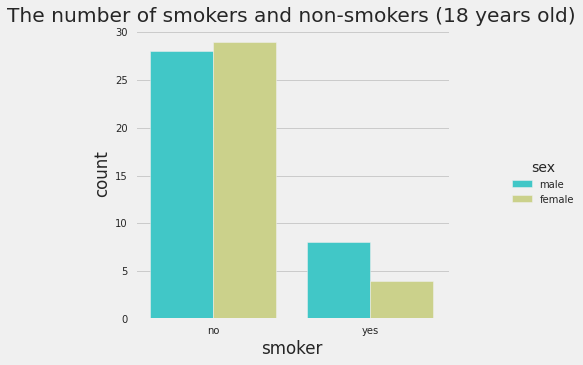

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[df['age']==18])
plt.title("The number of smokers and non-smokers (18 years old)")
plt.savefig('The number of smokers and non-smokers (18 years old)')

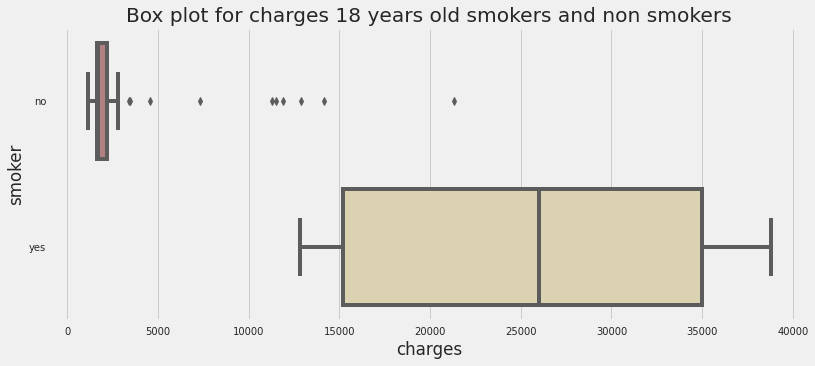

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers and non smokers")
sns.boxplot(y="smoker", x="charges", data =df[df['age']==18] , orient="h", palette = 'pink')
plt.savefig('Box plot for charges 18 years old smokers and non smokers')

In [ ]:
#As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." 
#I can assume that this is due to serious diseases or accidents.

Text(0.5, 1.0, 'Scatter plot of age vs charges for non-smokers')

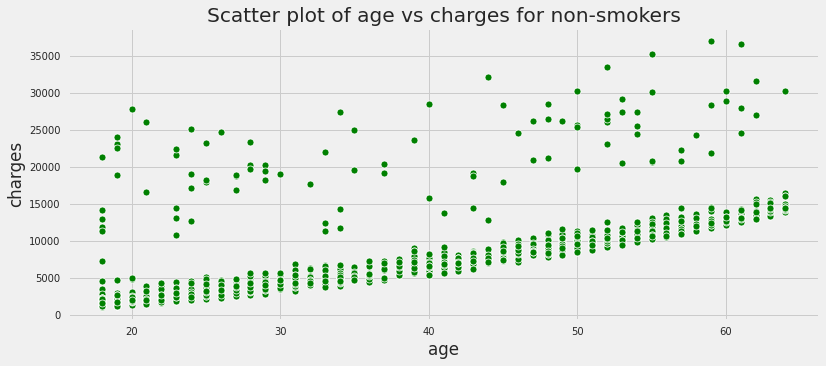

In [ ]:
#non - smokers
plt.figure(figsize=(12,5))
sns.scatterplot(x=data[data['smoker']==0].age,y=data[data['smoker']==0].charges,data=data,color='green',palette='yellow')
plt.title('Scatter plot of age vs charges for non-smokers')


Text(0.5, 1.0, 'Scatter plot of age vs charges for smokers')

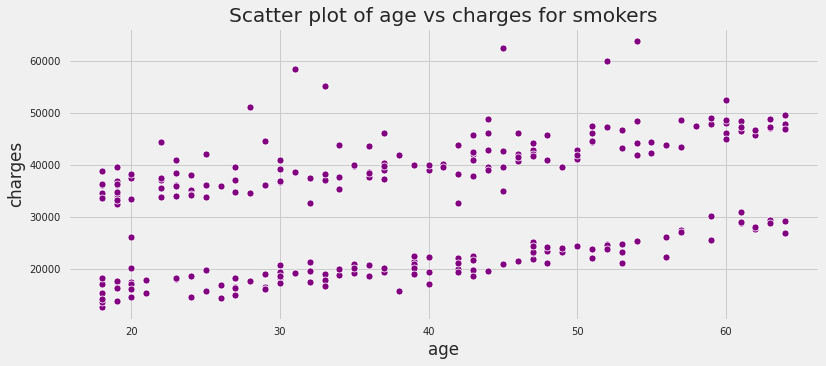

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=data[data['smoker']==1].age,y=data[data['smoker']==1].charges,data=data,color='purple')
plt.title('Scatter plot of age vs charges for smokers')


In [ ]:
  #Here we are creating a new column by dividing our age group into three categories.
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

In [ ]:
df['age_cat'].value_counts()

Young Adult     574
Senior Adult    548
Elder           216
Name: age_cat, dtype: int64

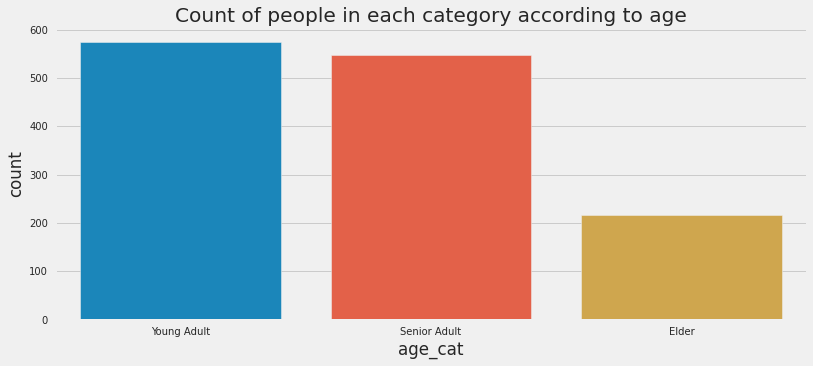

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df['age_cat'])
plt.title('Count of people in each category according to age')
plt.savefig('Count of people in each category according to age')

In [ ]:
#In non-smokers, the cost of treatment increases with age. In smoking people, we do not see such dependence. I think that it is not only in smoking but also in the peculiarities of 
#the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs. 
#But we work with what we have! Let's pay attention to bmi.

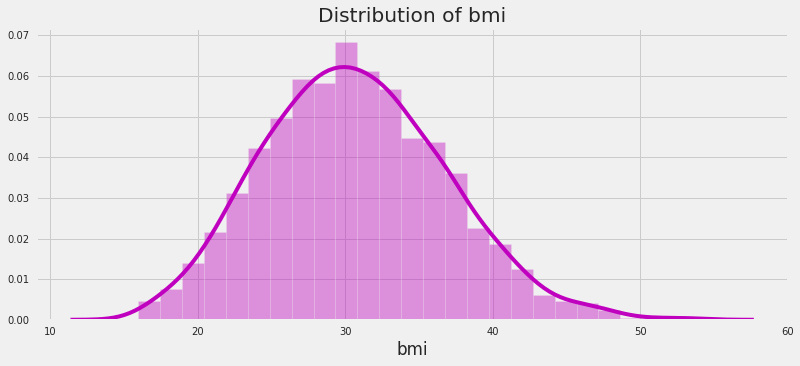

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')
plt.savefig('Distribution of bm')

In [ ]:
#This curve is somewhat normally distributed.Let's start to explore! First, let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.

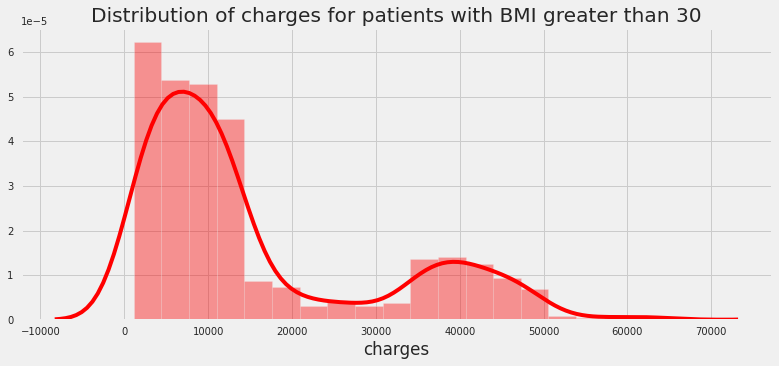

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'red')
plt.savefig('Distribution of charges with people having bmi>30')

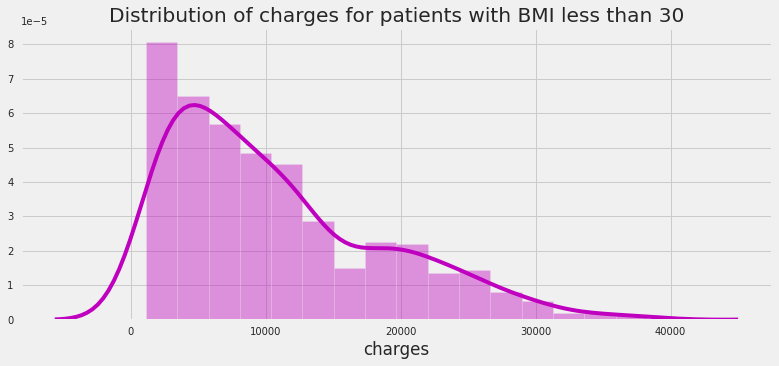

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'm')
plt.savefig('Distribution of charges with people having bmi<30')

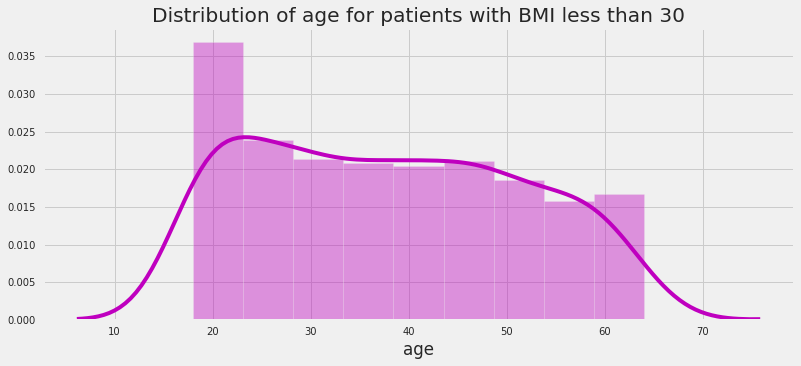

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['age'], color = 'm')
plt.savefig('Distribution of age with people having bmi<30')

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



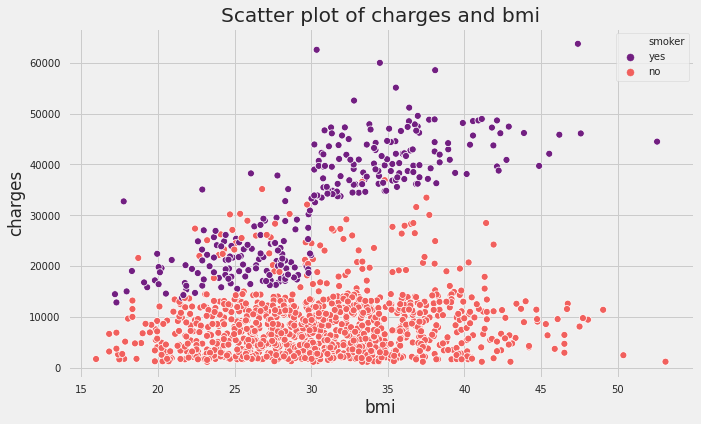

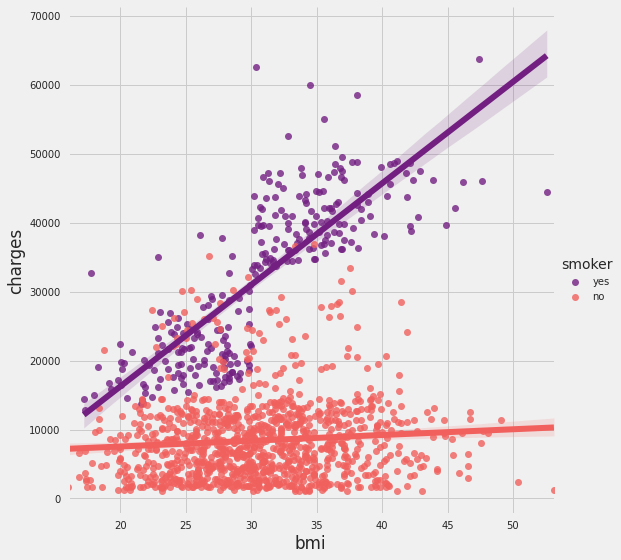

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)
plt.savefig('Scatter plot of charges and bmi with respect to bifurcation in smoking')

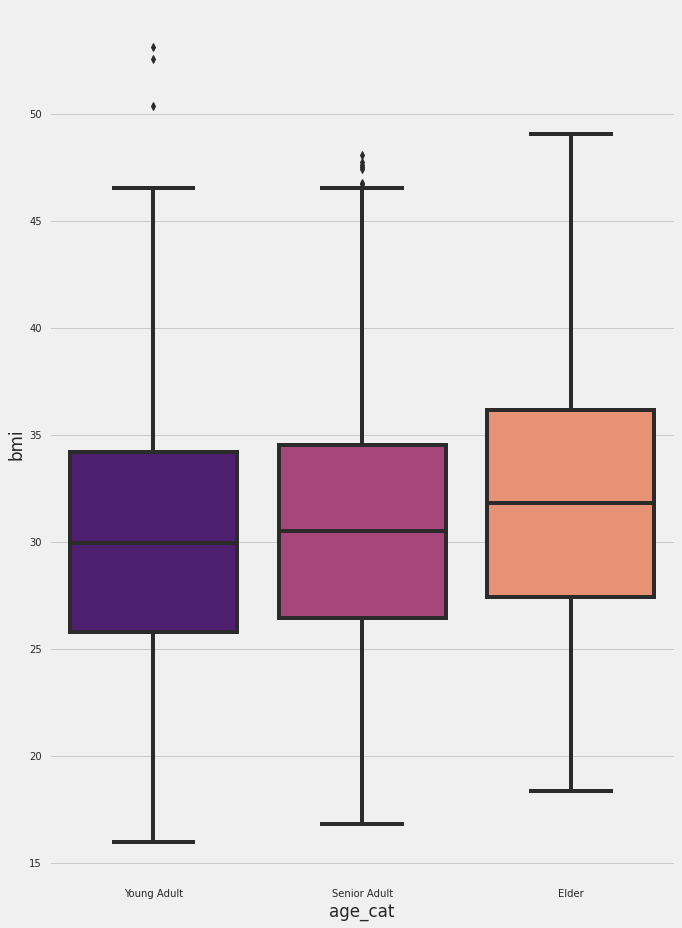

In [ ]:


young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adult = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values
plt.figure(figsize=(10,15))
sns.boxplot(df['age_cat'],df['bmi'],palette='magma')
plt.savefig('boxplot of bmi with respect to different age-category')

In [ ]:
#there are lot of outliers with respect young adult and senior adult age category

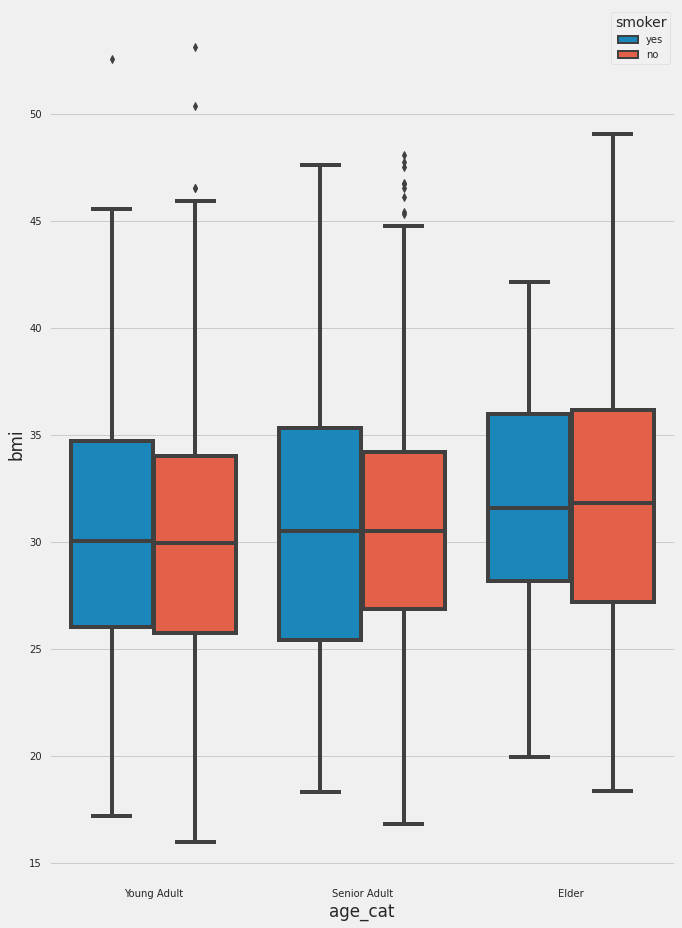

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(df['age_cat'],df['bmi'],hue=df['smoker'])
plt.savefig('boxplot of bmi with respect to different age-category and smoking habits')

In [ ]:
#non smokers have lot of outliers and have higher bmi and their tails are longer.

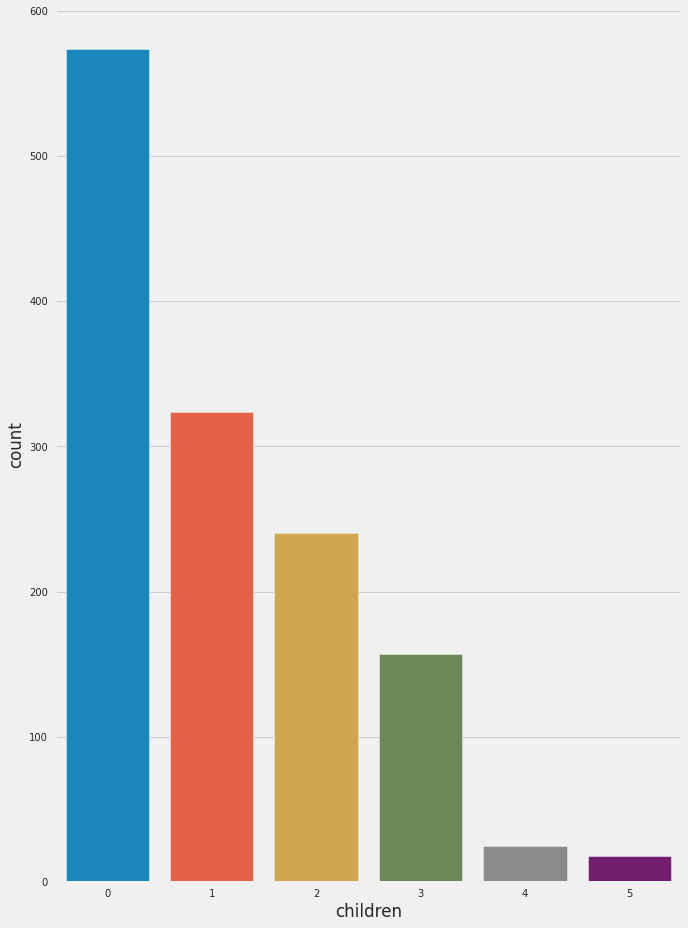

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(df['children'])
plt.savefig('countplot children')

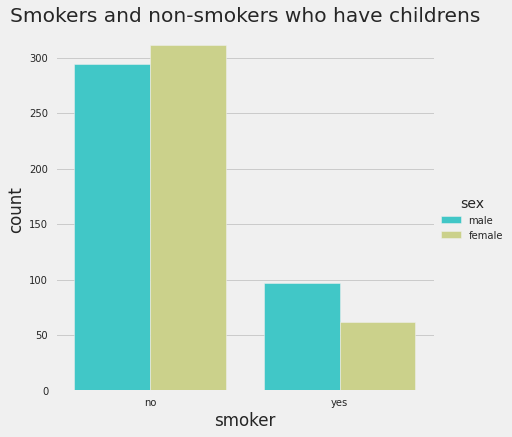

In [ ]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)], height = 6)
plt.title('Smokers and non-smokers who have childrens')
plt.savefig('Smokers and non-smokers who have children')

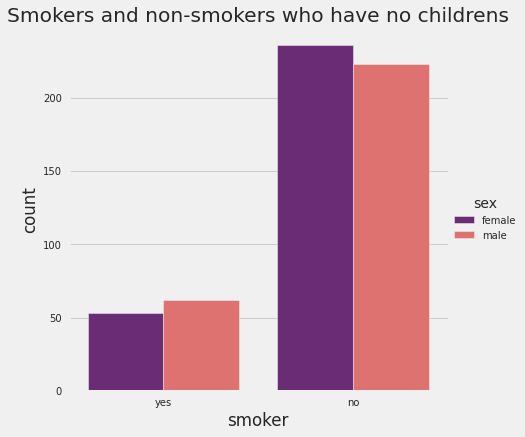

In [ ]:
sns.catplot(x="smoker", kind="count", palette="magma",hue = "sex",
            data=df[(df.children ==0)], height = 6)
plt.title('Smokers and non-smokers who have no childrens')
plt.savefig('Smokers and non-smokers who have no children')

Text(0.5, 1.0, 'Average charges incurred by patients based on the number of children/dependents')

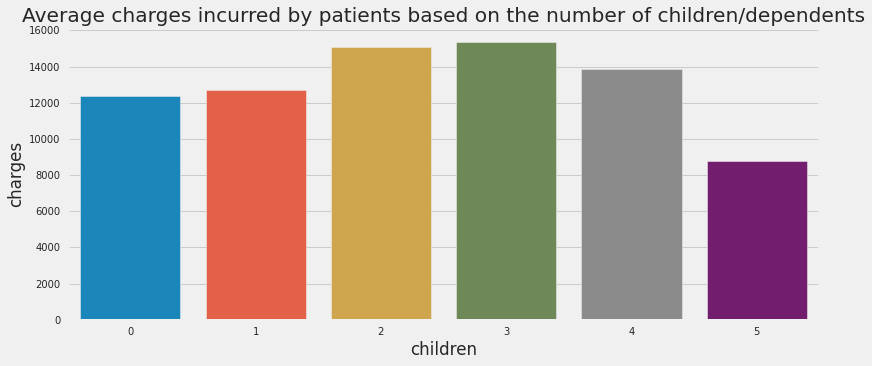

In [ ]:
df3=df.groupby('children').agg({'charges':np.mean}).sort_values(by='charges',ascending=False)
df3.reset_index(inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(df3['children'],df3['charges'])
plt.title('Average charges incurred by patients based on the number of children/dependents')

In [ ]:
df3

,children,charges
0,3,15355.318367
1,2,15073.563734
2,4,13850.656311
3,1,12731.171832
4,0,12365.975602
5,5,8786.035247


In [ ]:
#creating a new columns -weight condition with respect to bmi's
for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


In [ ]:
df['weight_condition'].value_counts()

Obese            707
Overweight       386
Normal Weight    225
Underweight       20
Name: weight_condition, dtype: int64

Text(0.5, 1.0, 'Weight condition')

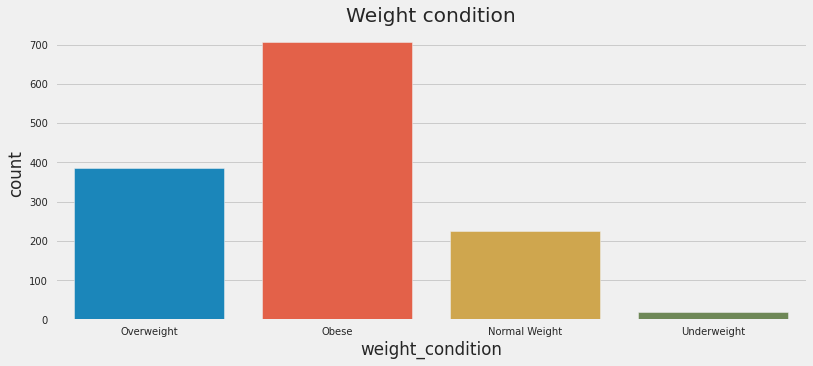

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df['weight_condition'])
plt.title('Weight condition')


<Figure size 864x360 with 0 Axes>

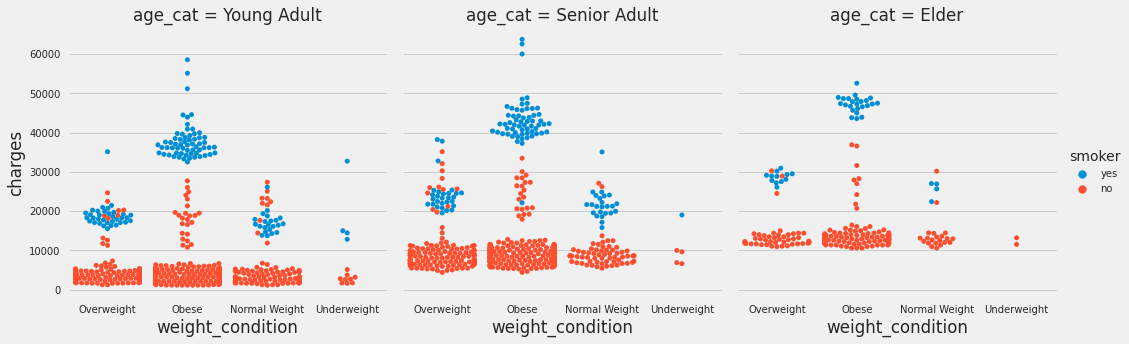

In [ ]:
plt.figure(figsize=(12,5))
sns.catplot(x='weight_condition',y='charges',hue='smoker',data=df,col='age_cat',kind='swarm')


In [ ]:
chargedist_sm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")].values
chargedist_nsm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")].values


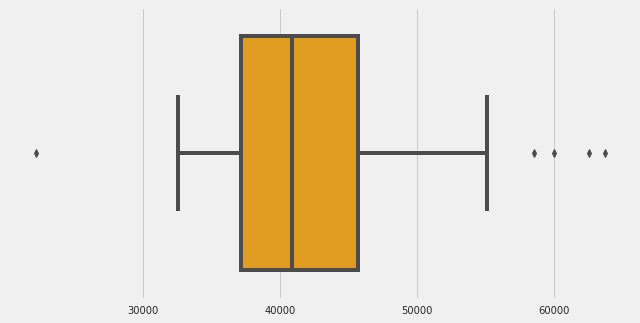

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=chargedist_sm,color='orange',orient='h')
plt.savefig('boxplot of smokers who are obese and their charges')


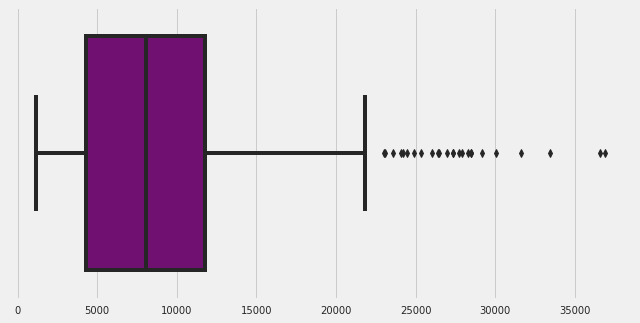

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=chargedist_nsm,color='purple',orient='h')
plt.savefig('boxplot of non -smokers who are non- obese and their charges')


In [ ]:
#People who smoke and are obese their charges are far more than those people who are non-obese and dont smoke

In [ ]:
df1=df.groupby('region').agg({'charges':np.mean,'bmi':np.mean}).sort_values(by='charges',ascending=False)
df1.reset_index(inplace=True)
df1

,region,charges,bmi
0,southeast,14735.411438,33.355989
1,northeast,13406.384516,29.173503
2,northwest,12417.575374,29.199785
3,southwest,12346.937377,30.596615


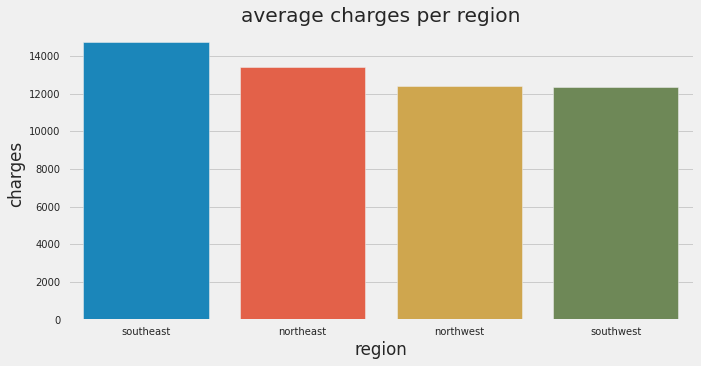

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='region',y='charges',data=df1)
plt.title('average charges per region')
plt.savefig('average charges region wise')

In [ ]:
region_smoker = pd.crosstab(df['smoker'], df['region']).apply(lambda x: x/x.sum() * 100)
region_smoker

#southeast region has the highest percantage of smoking population

region,northeast,northwest,southeast,southwest
smoker,,,,
no,79.320988,82.153846,75.0,82.153846
yes,20.679012,17.846154,25.0,17.846154


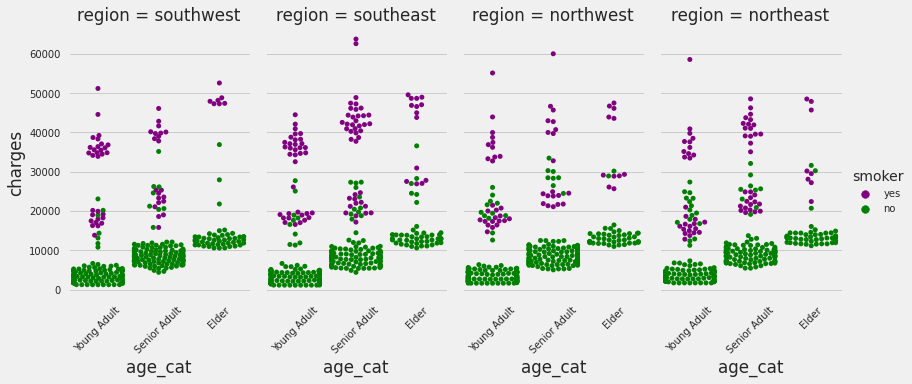

<Figure size 576x396 with 0 Axes>

In [ ]:
plt.style.use('fivethirtyeight')

ticks = df['age_cat'].unique()
colors = ['purple', 'green']


ax = sns.catplot(x="age_cat", y="charges", hue="smoker",
                 col="region", aspect=.6,kind="swarm",
                  palette=colors, data=df);

ax.set_xticklabels(labels = ticks, rotation=45)

plt.show()
plt.savefig('region wise plot of age category with respect to smokers and non smokers.')

In [ ]:
region_weight = pd.crosstab(df['weight_condition'], df['region']).apply(lambda x: x/x.sum() * 100)
region_weight = round(region_weight, 2)
region_weight

region,northeast,northwest,southeast,southwest
weight_condition,,,,
Normal Weight,22.53,19.38,11.26,14.77
Obese,44.14,45.54,66.76,53.23
Overweight,30.25,32.92,21.98,31.08
Underweight,3.09,2.15,0.00,0.92


In [ ]:
df.groupby('region').agg({'charges':np.mean})

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


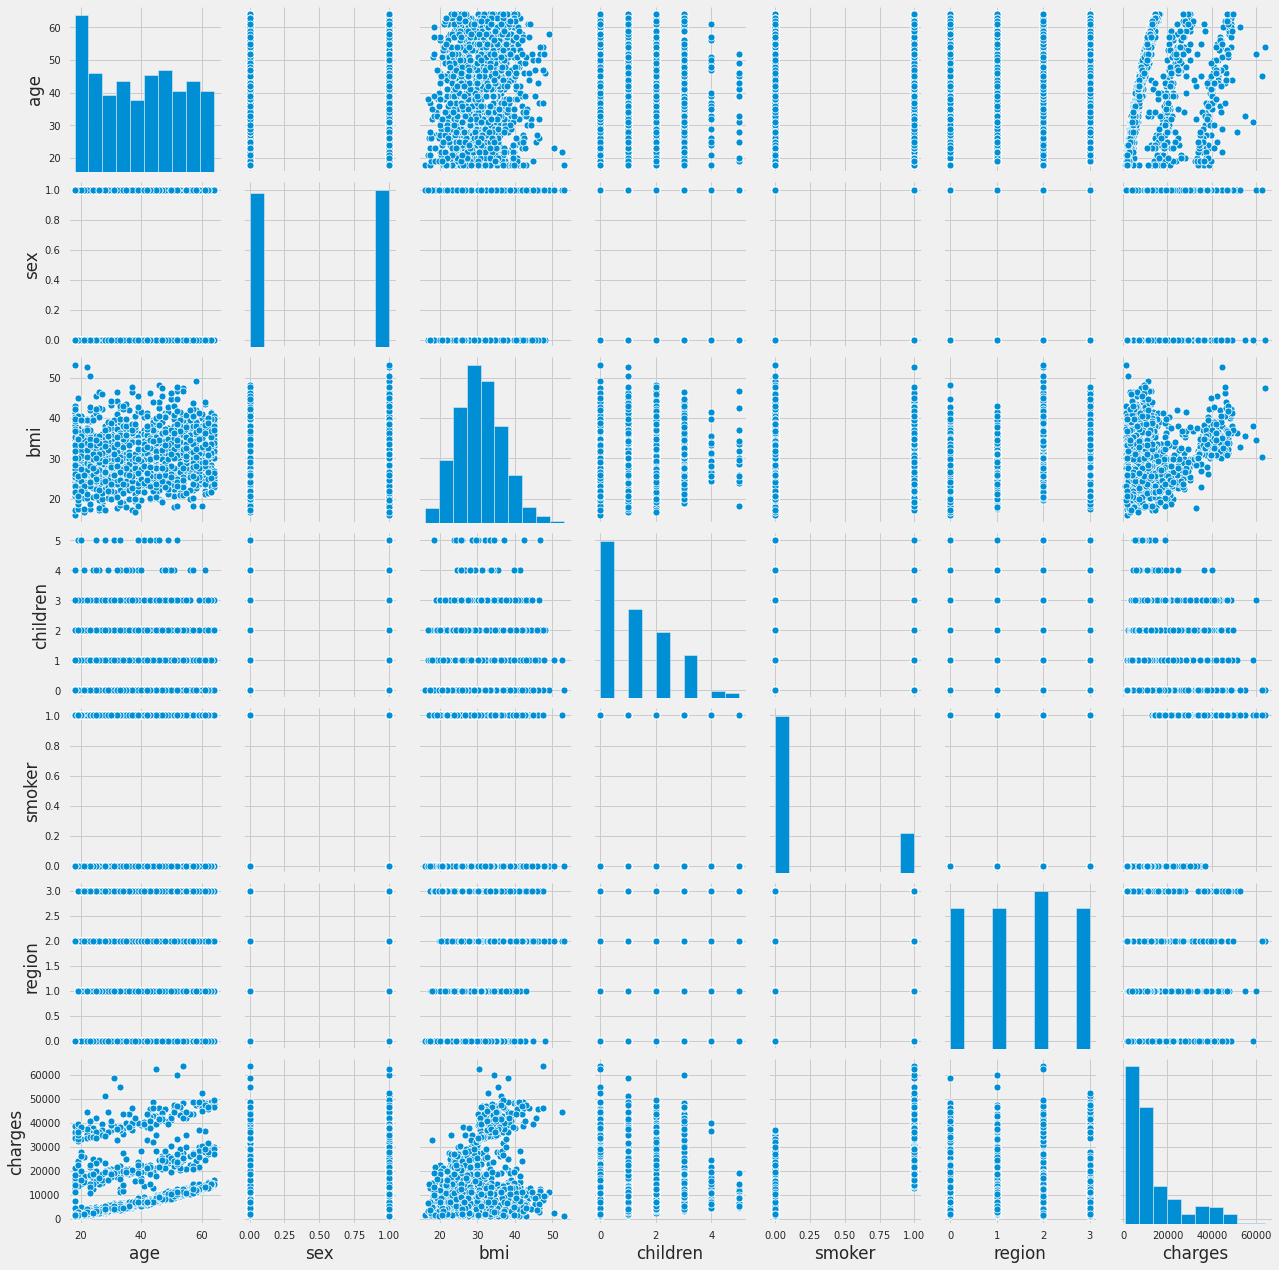

In [ ]:
sns.pairplot(data)
plt.savefig('pairplot')

In [ ]:
#Southeast people have the most obese population and hence their treatment cost is the highest.

In [ ]:
df_=df[['age',"sex","bmi","children","smoker","region","charges"]]
df__=df[['sex','children','smoker','region']]

In [ ]:
for i in df__.columns[0:4]:
  print(i)
  print(df__[i].value_counts())

sex
male      676
female    662
Name: sex, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
smoker
no     1064
yes     274
Name: smoker, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
df_1=pd.get_dummies(df_,drop_first=True)

In [ ]:
df_1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
X=df_1.drop(['charges'],1)
Y=df_1['charges']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 40)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(1003, 8)
(335, 8)
(1003,)
(335,)


In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
r2_score(Y_test,y_pred)

0.726793855348103

In [ ]:
np.sqrt(mean_squared_error(Y_test,y_pred))

6220.941873929242

In [ ]:
lr.intercept_


-11831.261199617627

In [ ]:
pd.DataFrame(lr.coef_,index=X.columns)

,0
age,257.879551
bmi,332.236662
children,601.896409
sex_male,-134.994428
smoker_yes,23775.677492
region_northwest,-862.281198
region_southeast,-862.503571
region_southwest,-989.616789


In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:01:31   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

In [ ]:
pca=PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [ ]:
finalDf = pd.concat([principalDf,Y], axis=1)


In [ ]:
finalDf

,pc1,pc2,charges
0,-20.337308,-1.590311,16884.92400
1,-20.991085,4.352199,1725.55230
2,-11.045477,3.005379,4449.46200
3,-6.663528,-7.594493,21984.47061
4,-7.302818,-1.373426,3866.85520
...,...,...,...
1333,10.799160,-0.329367,10600.54830
1334,-21.101475,2.480036,2205.98080
1335,-20.815000,7.420609,1629.83350
1336,-18.462085,-3.802949,2007.94500


In [ ]:
pca.explained_variance_ratio_

array([0.83515297, 0.15467639])

In [ ]:
type(finalDf)

pandas.core.frame.DataFrame

In [ ]:
model = smf.ols(formula='charges ~ pc1 + pc2', data=finalDf)
results_formula = model.fit()
results_formula.params
print(results_formula.pvalues)


Intercept    2.400537e-251
pc1           1.416339e-30
pc2           7.858787e-10
dtype: float64


In [ ]:
x2=finalDf.drop('charges',1)
y2=finalDf['charges']

In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.25,random_state=120)

In [ ]:
lr.fit(x2_train,y2_train)
y_pred2=lr.predict(x2_test)
print(r2_score(y_pred2,y2_test))
print(np.sqrt(mean_squared_error(y_pred2,y2_test)))

-5.451006367611268
11083.36219120959


In [ ]:
X2 = sm.add_constant(x2)
est = sm.OLS(y2,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.64
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           7.18e-37
Time:                        18:01:32   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+04    311.292     42.630      0.0

In [ ]:
x_surf, y_surf = np.meshgrid(np.linspace(finalDf['pc1'].min(), finalDf['pc1'].max(), 335),np.linspace(finalDf['pc2'].min(), finalDf['pc2'].max(), 335))
onlyX = pd.DataFrame({'pc1': x_surf.ravel(), 'pc2': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)
z1=fittedY.values.reshape(x_surf.shape)
z1.shape

(335, 335)

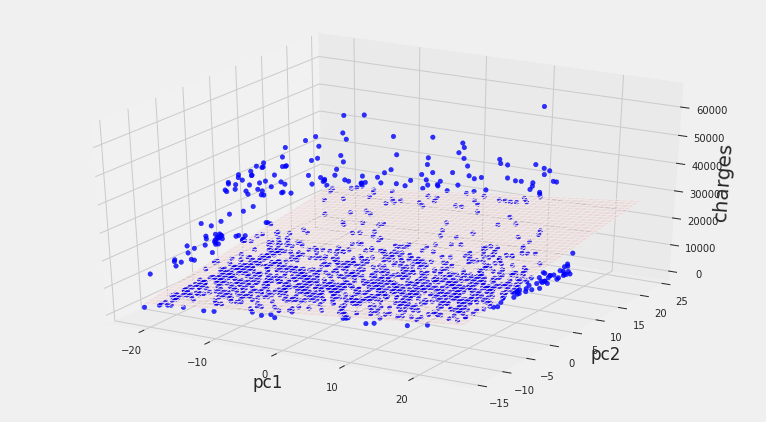

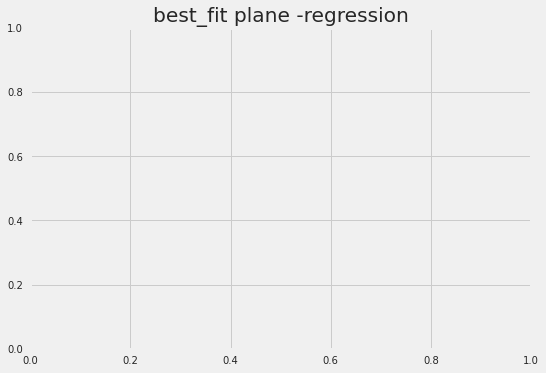

In [ ]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf['pc1'],finalDf['pc2'],finalDf['charges'],c='blue', marker='o', alpha=0.8)
ax.plot_surface(x_surf,y_surf,fittedY.values.reshape(x_surf.shape), color='red', alpha=0.07)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('charges',fontsize=20)
plt.show()
plt.title('best_fit plane -regression')
plt.savefig('best fit plane-regression')

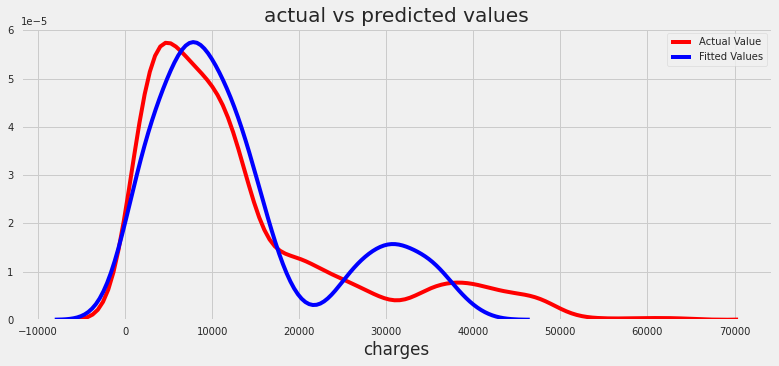

In [ ]:
plt.figure(figsize=(12,5))
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred ,hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('actual vs predicted values')
plt.savefig('actual vs predicted values')

In [ ]:
df_1.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
clf1=setup(df_1,target='charges',train_size=0.75)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,2337
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,2465.0111,20324216.5578,4457.3531,0.8611,0.4153,0.2865,0.0660
1,Gradient Boosting Regressor,2488.9376,20597271.9359,4487.3690,0.8595,0.4167,0.2876,0.1028
2,CatBoost Regressor,2696.7403,23459577.4305,4793.9582,0.8405,0.4814,0.3102,0.9312
3,Light Gradient Boosting Machine,2857.4694,23639144.6750,4817.6738,0.8377,0.5419,0.3500,0.0701
4,Random Forest,2769.8887,24252325.0853,4884.8428,0.8335,0.4702,0.3345,0.3530
5,AdaBoost Regressor,4045.6859,26347627.7150,5117.0470,0.8176,0.6112,0.6932,0.0271
6,Extra Trees Regressor,2767.5132,27568201.6085,5212.4567,0.8108,0.4753,0.3137,0.2685
7,Ridge Regression,4276.9751,36750696.5897,6037.8670,0.7507,0.6029,0.4388,0.0056
8,Least Angle Regression,4264.5044,36740012.9475,6037.1788,0.7507,0.6055,0.4368,0.0079
9,Lasso Least Angle Regression,4262.4739,36758789.5327,6037.8235,0.7507,0.6147,0.4360,0.0074


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=2337,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)